# Entrenamiento

Se busca predecir la personalidad del autor de un texto, es decir, se usa texto como entrada y la salida es una de las 16 personalidades de Myers-Briggs.

Lo primero es cargar el dataset usando Pandas, este contiene solo dos columnas, personalidad y post que corresponden a la personalidad y el contenido de un post de X.

Se crea una bolsa de palabras utilizando TfidVectorizer, que se basa en la frecuencia de las palabras para determinar su importancia.

In [1]:
import joblib as jb

X_train = jb.load("X_train.lzma")
y_train = jb.load("y_train.lzma")

## Hiperparámetros

Realizamos pruebas con distintos parámetros para encontrar los que mejor resuelvan nuestro problema.

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, truncnorm, uniform

rf = RandomForestClassifier(n_jobs=8)

random_search = RandomizedSearchCV(rf, {
    'n_estimators': randint(50,200),
}, n_iter=20, cv=10, random_state=42)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

{'max_features': 0.26338715088042397, 'min_samples_split': 0.021558638821471694, 'n_estimators': 137}


In [5]:
print(random_search.best_score_)

0.17350000000000002


Para la clasificación usamos el modelo Random Forest Classifier, que explorando distintos notebooks en Kaggle resultó ser el más preciso frente a otros clasificadores.

In [7]:

svc = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'], random_state=42, n_jobs=4)

svc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=137, n_jobs=4, random_state=42)


Creamos un subconjunto de datos a partir de un DataFrame mas grande, en concreto, de las últimas 1000 filas del dataframe


In [8]:
X_test = jb.load("X_test.lzma")
y_test = jb.load("y_test.lzma")

Realizamos algunas operaciones de preprocesamiento de texto en un conjunto de datos de prueba utilizando la librería NLTK

Aplicamos un modelo previamente creado para transformar datos de texto preprocesados  en un formato de Bolsa de Palabras

Utilizaremos un conjunto de datos de prueba llamado textsBowTest que contiene características como una bolsa de palabras


In [9]:
predictions = svc.predict(X_test)

Utilizamos la funcion classification_report para generar un reporte de clasificación detallado en función de las predicciones realizadas por el modelo

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.19      0.04      0.07       224
           2       0.29      0.12      0.17       729
           3       0.17      0.09      0.12       968
           4       0.22      0.22      0.22      1101
           5       0.14      0.04      0.06       283
           6       0.29      0.06      0.10       164
           7       0.18      0.28      0.22      1474
           8       0.17      0.38      0.24      1510
           9       0.06      0.01      0.01       168
          10       0.07      0.01      0.02        73
          11       0.14      0.04      0.07       606
          12       0.16      0.20      0.18      1290
          13       0.21      0.04      0.07       101
          14       0.21      0.02      0.04       125
          15       0.18      0.09      0.12       847
          16       0.05      0.01      0.02       337

    accuracy                           0.18     10000
   macro avg       0.17   

La matriz de confusión permite ver si el modelo "confunde", es decir, clasifica erróneamente datos de prueba, de forma que la posición (1,1) indica el número de pruebas de la personalidad 1 (ISTJ) se identificaron como con esa personalidad. En resumen, un buen modelo tendría una diagonal desde (1,1) a (16,1) con variaciones no demasiado significativas.

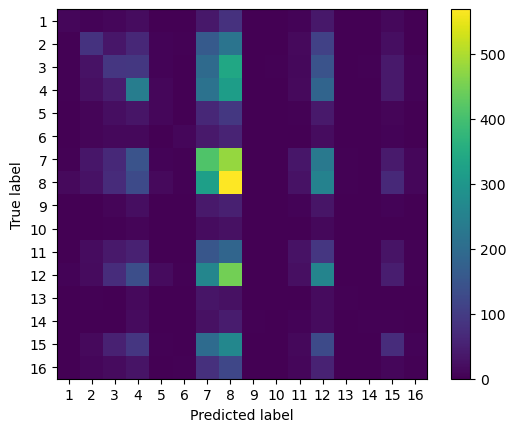

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,predictions,
                                        include_values=False)
plt.show()

El código utiliza la librería joblib para guardar objetos de Python en archivos para su posterior carga y uso, en este caso se guardará el modelo

In [6]:
jb.dump(svc, "rfc.lzma")

['rfc.lzma']